In [150]:
import numpy as np
# Importa a biblioteca NumPy, que é usada para manipulação de arrays e operações numéricas.

from sklearn.model_selection import cross_val_score, train_test_split
# Importa a função 'cross_val_score' para realizar validação cruzada e 'train_test_split' para dividir o dataset em conjuntos de treino e teste.

from sklearn import datasets
# Importa o módulo 'datasets' da biblioteca sklearn, que contém vários datasets de exemplo, incluindo o famoso dataset Iris.

from sklearn import svm
# Importa o módulo SVM (Support Vector Machine) da biblioteca sklearn, que contém implementações do algoritmo de máquinas de vetor de suporte.

# Carrega o dataset Iris, que contém 150 amostras de flores, divididas em três classes com base em suas características.
iris = datasets.load_iris()

# O dataset Iris contém os seguintes dados:
# - 'data': um array de 150 amostras de 4 características (comprimento e largura da sépala e da pétala).
# - 'target': os rótulos das amostras (três espécies de Iris, representadas por 0, 1 e 2).


Uma única divisão de treinamento/teste é facilitada com a função train_test_split na biblioteca cross_validation:

In [151]:
# Divide os dados Iris em conjuntos de treino e teste, com 40% dos dados reservados para o teste
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

# Constrói um modelo SVC (Support Vector Classifier) usando os dados de treino
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)

# Mede o desempenho do modelo no conjunto de dados de teste
score = clf.score(X_test, y_test)

print("Accuracy of the model:", score)


Accuracy of the model: 0.9666666666666667


A validação cruzada K-Fold é igualmente fácil; vamos usar um K de 5:

In [152]:
# Realiza a validação cruzada com o classificador 'clf', usando todo o conjunto de dados Iris
# e as classes reais, dividindo os dados em 5 partes (folds)
scores = cross_val_score(clf, iris.data, iris.target, cv=5)

# Imprime a acurácia de cada fold
print("Accuracy for each fold:", scores)

# Imprime a acurácia média de todos os 5 folds
print("Mean accuracy across all folds:", scores.mean())


Accuracy for each fold: [0.96666667 1.         0.96666667 0.96666667 1.        ]
Mean accuracy across all folds: 0.9800000000000001


Nosso modelo é ainda melhor do que pensávamos! Podemos fazer melhor? Vamos tentar um kernel diferente (poli):

In [153]:
# Cria um classificador SVC (Support Vector Classifier) com kernel polinomial
clf = svm.SVC(kernel='poly', C=1)

# Realiza a validação cruzada com o classificador 'clf', usando todo o conjunto de dados Iris
# e as classes reais, dividindo os dados em 5 partes (folds)
scores = cross_val_score(clf, iris.data, iris.target, cv=5)

# Imprime a acurácia de cada fold
print("Accuracy for each fold:", scores)

# Imprime a acurácia média de todos os 5 folds
print("Mean accuracy across all folds:", scores.mean())


Accuracy for each fold: [0.96666667 1.         0.96666667 0.96666667 1.        ]
Mean accuracy across all folds: 0.9800000000000001


In [154]:
# Cria um classificador SVC (Support Vector Classifier) com kernel polinomial
clf = svm.SVC(kernel='poly', C=2)

# Realiza a validação cruzada com o classificador 'clf', usando todo o conjunto de dados Iris
# e as classes reais, dividindo os dados em 5 partes (folds)
scores = cross_val_score(clf, iris.data, iris.target, cv=5)

# Imprime a acurácia de cada fold
print("Accuracy for each fold:", scores)

# Imprime a acurácia média de todos os 5 folds
print("Mean accuracy across all folds:", scores.mean())

Accuracy for each fold: [0.96666667 1.         0.9        0.96666667 1.        ]
Mean accuracy across all folds: 0.9666666666666668


Não! O kernel polinomial mais complexo produziu menor precisão do que um kernel linear simples. O kernel polinomial está sobreajustado. Mas não poderíamos ter dito isso com uma única divisão de treinamento/teste:

In [155]:
# Build an SVC model for predicting iris classifications using training data
clf = svm.SVC(kernel='poly', C=1).fit(X_train, y_train)

# Now measure its performance with the test data
clf.score(X_test, y_test)   

0.9

In [156]:

from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split

# Carregar o conjunto de dados Iris
iris = datasets.load_iris()

# Dividir os dados Iris em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

# Treinar o modelo SVC com kernel linear
linear_clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
linear_accuracy = linear_clf.score(X_test, y_test)

# Treinar o modelo SVC com kernel polinomial de grau 2
poly_clf = svm.SVC(kernel='poly', degree=2, C=1).fit(X_train, y_train)
poly_accuracy = poly_clf.score(X_test, y_test)

# Imprimir as acurácias de ambos os modelos
print(f"Accuracy of the model with linear kernel: {linear_accuracy:.4f}")
print(f"Accuracy of the model with polynomial kernel (degree 2): {poly_accuracy:.4f}")

# Comparar os resultados
if linear_accuracy > poly_accuracy:
    print("The linear kernel performed better.")
elif poly_accuracy > linear_accuracy:
    print("The polynomial kernel (degree 2) performed better.")
else:
    print("Both kernels performed equally well.")


Accuracy of the model with linear kernel: 0.9667
Accuracy of the model with polynomial kernel (degree 2): 0.9500
The linear kernel performed better.


Essa é a mesma pontuação que obtivemos com uma única divisão de treinamento/teste no kernel linear.

## Activity
O kernel "poli" para SVC na verdade tem outro atributo para o número de graus do polinômio usado, cujo padrão é 3. Por exemplo, svm.SVC(kernel='poly', grau=3, C=1)

Achamos que o polinômio padrão de terceiro grau é sobreajustado, com base nos resultados acima. Mas que tal 2? Experimente e compare-o com o kernel linear

In [157]:
import numpy as np
# Importa a biblioteca NumPy, que é usada para manipulação de arrays e operações numéricas.

from sklearn.model_selection import cross_val_score, train_test_split
# Importa a função 'cross_val_score' para realizar validação cruzada e 'train_test_split' para dividir o dataset em conjuntos de treino e teste.

from sklearn import datasets
# Importa o módulo 'datasets' da biblioteca sklearn, que contém vários datasets de exemplo, incluindo o famoso dataset Iris.

from sklearn import svm
# Importa o módulo SVM (Support Vector Machine) da biblioteca sklearn, que contém implementações do algoritmo de máquinas de vetor de suporte.

# Carrega o dataset Iris, que contém 150 amostras de flores, divididas em três classes com base em suas características.
iris = datasets.load_iris()

# O dataset Iris contém os seguintes dados:
# - 'data': um array de 150 amostras de 4 características (comprimento e largura da sépala e da pétala).
# - 'target': os rótulos das amostras (três espécies de Iris, representadas por 0, 1 e 2).


In [158]:
# Divide os dados Iris em conjuntos de treino e teste, com 45% dos dados reservados para o teste
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.5, random_state=0)

# Constrói um modelo SVC (Support Vector Classifier) usando os dados de treino
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)

# Mede o desempenho do modelo no conjunto de dados de teste
score = clf.score(X_test, y_test)

print("Accuracy of the model:", score)


Accuracy of the model: 0.9733333333333334


In [159]:
# Realiza a validação cruzada com o classificador 'clf', usando todo o conjunto de dados Iris
# e as classes reais, dividindo os dados em 5 partes (folds)
scores = cross_val_score(clf, iris.data, iris.target, cv=5)

# Imprime a acurácia de cada fold
print("Accuracy for each fold:", scores)

# Imprime a acurácia média de todos os 5 folds
print("Mean accuracy across all folds:", scores.mean())


Accuracy for each fold: [0.96666667 1.         0.96666667 0.96666667 1.        ]
Mean accuracy across all folds: 0.9800000000000001


In [160]:
# Realiza a validação cruzada com o classificador 'clf', usando todo o conjunto de dados Iris
# e as classes reais, dividindo os dados em 5 partes (folds)
scores = cross_val_score(clf, iris.data, iris.target, cv=7)

# Imprime a acurácia de cada fold
print("Accuracy for each fold:", scores)

# Imprime a acurácia média de todos os 5 folds
print("Mean accuracy across all folds:", scores.mean())


Accuracy for each fold: [0.95454545 1.         0.95454545 0.95238095 0.95238095 1.
 1.        ]
Mean accuracy across all folds: 0.9734075448361164


In [161]:
# Realiza a validação cruzada com o classificador 'clf', usando todo o conjunto de dados Iris
# e as classes reais, dividindo os dados em 5 partes (folds)
scores = cross_val_score(clf, iris.data, iris.target, cv=8)

# Imprime a acurácia de cada fold
print("Accuracy for each fold:", scores)

# Imprime a acurácia média de todos os 5 folds
print("Mean accuracy across all folds:", scores.mean())


Accuracy for each fold: [1.         1.         1.         0.94736842 1.         0.94736842
 1.         1.        ]
Mean accuracy across all folds: 0.9868421052631579


In [162]:
# Realiza a validação cruzada com o classificador 'clf', usando todo o conjunto de dados Iris
# e as classes reais, dividindo os dados em 5 partes (folds)
scores = cross_val_score(clf, iris.data, iris.target, cv=10)

# Imprime a acurácia de cada fold
print("Accuracy for each fold:", scores)

# Imprime a acurácia média de todos os 5 folds
print("Mean accuracy across all folds:", scores.mean())


Accuracy for each fold: [1.         0.93333333 1.         1.         0.86666667 1.
 0.93333333 1.         1.         1.        ]
Mean accuracy across all folds: 0.9733333333333334


In [163]:
# Divide os dados Iris em conjuntos de treino e teste, com 40% dos dados reservados para o teste
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

# Constrói um modelo SVC (Support Vector Classifier) usando os dados de treino
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)

# Mede o desempenho do modelo no conjunto de dados de teste
score = clf.score(X_test, y_test)

print("Accuracy of the model:", score)


Accuracy of the model: 0.9666666666666667


In [164]:
import numpy as np
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split

# Carregar o conjunto de dados Iris
iris = datasets.load_iris()

# Dividir os dados Iris em conjuntos de treino e teste (60% treino, 40% teste)
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

# Treinar o modelo SVC com kernel linear
linear_clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
linear_accuracy = linear_clf.score(X_test, y_test)

# Treinar o modelo SVC com kernel polinomial de grau 2
poly_clf = svm.SVC(kernel='poly', degree=2, C=1).fit(X_train, y_train)
poly_accuracy = poly_clf.score(X_test, y_test)

# Imprimir as acurácias de ambos os modelos
print(f"Accuracy of the model with linear kernel: {linear_accuracy:.4f}")
print(f"Accuracy of the model with polynomial kernel (degree 2): {poly_accuracy:.4f}")

# Comparar os resultados
if linear_accuracy > poly_accuracy:
    print("The linear kernel performed better.")
elif poly_accuracy > linear_accuracy:
    print("The polynomial kernel (degree 2) performed better.")
else:
    print("Both kernels performed equally well.")


Accuracy of the model with linear kernel: 0.9667
Accuracy of the model with polynomial kernel (degree 2): 0.9500
The linear kernel performed better.


In [165]:
import numpy as np
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split

# Carregar o conjunto de dados Iris
iris = datasets.load_iris()

# Dividir os dados Iris em conjuntos de treino e teste (60% treino, 40% teste)
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

# Treinar o modelo SVC com kernel linear
linear_clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
linear_accuracy = linear_clf.score(X_test, y_test)

# Treinar o modelo SVC com kernel polinomial de grau 2
poly_clf = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train)
poly_accuracy = poly_clf.score(X_test, y_test)

# Imprimir as acurácias de ambos os modelos
print(f"Accuracy of the model with linear kernel: {linear_accuracy:.4f}")
print(f"Accuracy of the model with polynomial kernel (degree 2): {poly_accuracy:.4f}")

# Comparar os resultados
if linear_accuracy > poly_accuracy:
    print("The linear kernel performed better.")
elif poly_accuracy > linear_accuracy:
    print("The polynomial kernel (degree 2) performed better.")
else:
    print("Both kernels performed equally well.")


Accuracy of the model with linear kernel: 0.9667
Accuracy of the model with polynomial kernel (degree 2): 0.9000
The linear kernel performed better.


In [166]:
import numpy as np
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split

# Carregar o conjunto de dados Iris
iris = datasets.load_iris()

# Dividir os dados Iris em conjuntos de treino e teste (60% treino, 40% teste)
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.5, random_state=0)

# Treinar o modelo SVC com kernel linear
linear_clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
linear_accuracy = linear_clf.score(X_test, y_test)

# Treinar o modelo SVC com kernel polinomial de grau 2
poly_clf = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train)
poly_accuracy = poly_clf.score(X_test, y_test)

# Imprimir as acurácias de ambos os modelos
print(f"Accuracy of the model with linear kernel: {linear_accuracy:.4f}")
print(f"Accuracy of the model with polynomial kernel (degree 2): {poly_accuracy:.4f}")

# Comparar os resultados
if linear_accuracy > poly_accuracy:
    print("The linear kernel performed better.")
elif poly_accuracy > linear_accuracy:
    print("The polynomial kernel (degree 2) performed better.")
else:
    print("Both kernels performed equally well.")


Accuracy of the model with linear kernel: 0.9733
Accuracy of the model with polynomial kernel (degree 2): 0.9200
The linear kernel performed better.


Accuracy of the model with linear kernel: 0.9667
Accuracy of the model with polynomial kernel (degree 2): 0.9500


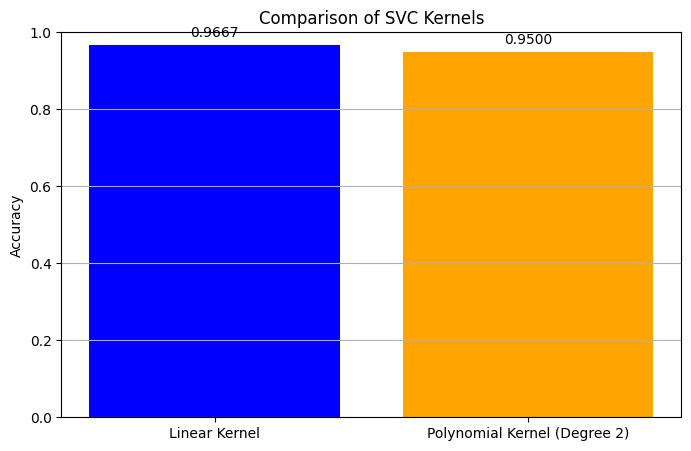

In [167]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split

# Carregar o conjunto de dados Iris
iris = datasets.load_iris()

# Dividir os dados Iris em conjuntos de treino e teste (60% treino, 40% teste)
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

# Treinar o modelo SVC com kernel linear
linear_clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
linear_accuracy = linear_clf.score(X_test, y_test)

# Treinar o modelo SVC com kernel polinomial de grau 2
poly_clf = svm.SVC(kernel='poly', degree=2, C=1).fit(X_train, y_train)
poly_accuracy = poly_clf.score(X_test, y_test)

# Imprimir as acurácias de ambos os modelos
print(f"Accuracy of the model with linear kernel: {linear_accuracy:.4f}")
print(f"Accuracy of the model with polynomial kernel (degree 2): {poly_accuracy:.4f}")

# Criar gráfico de comparação
kernels = ['Linear Kernel', 'Polynomial Kernel (Degree 2)']
accuracies = [linear_accuracy, poly_accuracy]

plt.figure(figsize=(8, 5))
plt.bar(kernels, accuracies, color=['blue', 'orange'])
plt.ylim(0, 1)  # Limitar o eixo y de 0 a 1
plt.ylabel('Accuracy')
plt.title('Comparison of SVC Kernels')
plt.grid(axis='y')

# Mostrar o valor das acurácias acima das barras
for i in range(len(accuracies)):
    plt.text(i, accuracies[i] + 0.02, f'{accuracies[i]:.4f}', ha='center')

plt.show()


Accuracy of the model with linear kernel: 0.9667
Accuracy of the model with polynomial kernel (degree 2): 0.9000


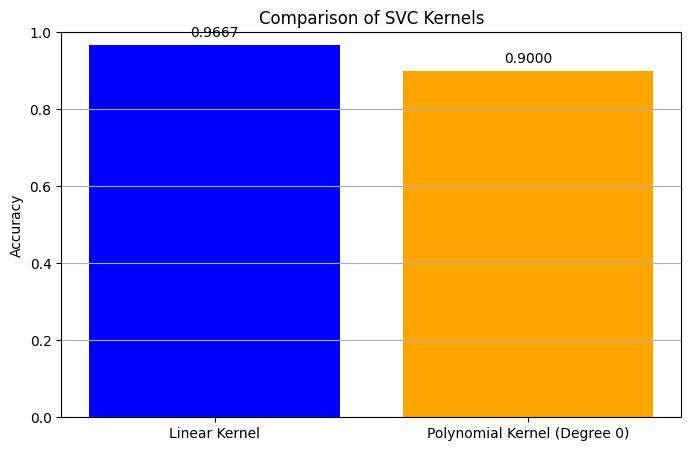

In [168]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split

# Carregar o conjunto de dados Iris
iris = datasets.load_iris()

# Dividir os dados Iris em conjuntos de treino e teste (60% treino, 40% teste)
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

# Treinar o modelo SVC com kernel linear
linear_clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
linear_accuracy = linear_clf.score(X_test, y_test)

# Treinar o modelo SVC com kernel polinomial de grau 2
poly_clf = svm.SVC(kernel='poly', C=1).fit(X_train, y_train)
poly_accuracy = poly_clf.score(X_test, y_test)

# Imprimir as acurácias de ambos os modelos
print(f"Accuracy of the model with linear kernel: {linear_accuracy:.4f}")
print(f"Accuracy of the model with polynomial kernel (degree 2): {poly_accuracy:.4f}")

# Criar gráfico de comparação
kernels = ['Linear Kernel', 'Polynomial Kernel (Degree 0)']
accuracies = [linear_accuracy, poly_accuracy]

plt.figure(figsize=(8, 5))
plt.bar(kernels, accuracies, color=['blue', 'orange'])
plt.ylim(0, 1)  # Limitar o eixo y de 0 a 1
plt.ylabel('Accuracy')
plt.title('Comparison of SVC Kernels')
plt.grid(axis='y')

# Mostrar o valor das acurácias acima das barras
for i in range(len(accuracies)):
    plt.text(i, accuracies[i] + 0.02, f'{accuracies[i]:.4f}', ha='center')

plt.show()


Accuracy of the model with linear kernel: 0.9667
Accuracy of the model with polynomial kernel (degree 2): 0.9000


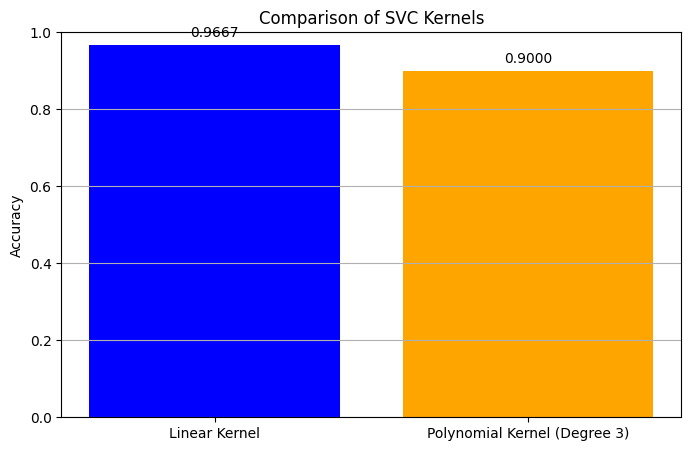

In [169]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split

# Carregar o conjunto de dados Iris
iris = datasets.load_iris()

# Dividir os dados Iris em conjuntos de treino e teste (60% treino, 40% teste)
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

# Treinar o modelo SVC com kernel linear
linear_clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
linear_accuracy = linear_clf.score(X_test, y_test)

# Treinar o modelo SVC com kernel polinomial de grau 2
poly_clf = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train)
poly_accuracy = poly_clf.score(X_test, y_test)

# Imprimir as acurácias de ambos os modelos
print(f"Accuracy of the model with linear kernel: {linear_accuracy:.4f}")
print(f"Accuracy of the model with polynomial kernel (degree 2): {poly_accuracy:.4f}")

# Criar gráfico de comparação
kernels = ['Linear Kernel', 'Polynomial Kernel (Degree 3)']
accuracies = [linear_accuracy, poly_accuracy]

plt.figure(figsize=(8, 5))
plt.bar(kernels, accuracies, color=['blue', 'orange'])
plt.ylim(0, 1)  # Limitar o eixo y de 0 a 1
plt.ylabel('Accuracy')
plt.title('Comparison of SVC Kernels')
plt.grid(axis='y')

# Mostrar o valor das acurácias acima das barras
for i in range(len(accuracies)):
    plt.text(i, accuracies[i] + 0.02, f'{accuracies[i]:.4f}', ha='center')

plt.show()
